In [121]:
import pandas as pd
import numpy as np

In [122]:
df = pd.read_excel(r'C:\Users\mrosk\OneDrive\Desktop\Mental-Health-in-Tech\Preprocessing\encoded_data.xlsx')

In [123]:
#Includes all diagnosis and work position features
df.drop(df.columns[0], inplace = True, axis = 1) 

features_to_drop = [
    'y__dissociative', 'y_eating', 'y_no_diagnosis', 'y_ocd', 'y_psychotic', 'm_adhd', 'm_eating', 
    'm_mood_disorder', 'm_no_diagnosis', 'm_ocd', 'm_personality', 'm_ptsd', 'm_psychotic', 
    'pro_dissociative', 'pro_eating', 'pro_no_diagnosis', 'pro_ocd', 'pro_psychotic', 'y_addictive', 
    'y_anxiety_stress', 'y_mood_disorder', 'y_autism_develop', 'y_other', 'y_ptsd', 'y_adhd', 
    'y_personality', 'm_addictive', 'm_anxiety_stress', 'm_autism_develop', 'm_other', 'm_dissociative', 
    'pro_adhd', 'pro_addictive', 'pro_anxiety_stress', 'pro_autism_develop', 'pro_mood_disorder', 
    'pro_ptsd', 'pro_personality', 'pro_other', 'back_end_developer', 'designer', 'dev_evangelist_advocate', 
    'devops_sysadmin', 'executive_leadership', 'front_end_developer', 'hr_rep', 'one_person_shop', 
    'other_job_description', 'sales_rep', 'supervisor_team_lead', 'support_rep'
]

df = df.drop(columns = features_to_drop)

'''
Already have detailed information about the most prevalent work positions and the current, believed, and professionally diagnosed disorders from your exploratory data analysis (EDA), 
dropping these features could help reduce redundant dimensionality. This can be particularly beneficial for improving model performance and interpretability by removing potential noise.
'''

'\nAlready have detailed information about the most prevalent work positions and the current, believed, and professionally diagnosed disorders from your exploratory data analysis (EDA), \ndropping these features could help reduce redundant dimensionality. This can be particularly beneficial for improving model performance and interpretability by removing potential noise.\n'

In [124]:
df.head()

,is_self_employed,num_employees,is_tech_company,provides_mental_health_benefits,has_discussed_mental_health,offers_mental_health_resources,is_anonymity_protected,ease_of_leave_for_mental_health,mental_health_discussion_consequences,physical_health_discussion_consequences,...,currently_has_mental_health_disorder,diagnosed_by_professional,sought_mental_health_treatment,interference_with_work_when_treated,interference_with_work_when_not_treated,age,works_remotely,gender_Female,gender_Male,gender_Non-Binary/Other
0,0,3,1,2,1,1,0,6,1,1,...,1,1,0,1,1,39,2,False,True,False
1,0,2,1,1,3,3,3,4,1,1,...,2,1,1,3,4,29,1,False,True,False
2,0,2,1,1,1,1,0,1,0,1,...,1,0,1,1,1,38,0,False,True,False
3,1,0,2,3,2,2,2,2,2,2,...,2,1,1,4,4,43,2,False,True,False
4,0,2,0,4,1,1,1,1,3,0,...,2,1,1,4,4,43,2,True,False,False


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [126]:
target_variable = 'currently_has_mental_health_disorder'

In [127]:
#features and target data 
X = df.drop(columns = [target_variable])
y = df[target_variable]

In [128]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

In [129]:
#normalize data
S_scaler = StandardScaler()
X_train_scaled_standard = S_scaler.fit_transform(X_train)
X_test_scaled_standard = S_scaler.transform(X_test)

MM_scaler = MinMaxScaler()
X_train_scaled_MM = MM_scaler.fit_transform(X_train)
X_test_scaled_MM = MM_scaler.transform(X_test)

In [130]:
# Feature Importance using RandomForest

forest = RandomForestClassifier(n_estimators=100,random_state=42)
forest.fit(X_train,y_train)

importances = forest.feature_importances_
feature_importance_rf = pd.DataFrame({'feature' : X.columns, 'importance' : importances}).sort_values(by='importance', ascending = False)

'''
RandomForest provides feature importance scores, indicating the contribution of each feature to the prediction.

Steps to interpret and select features:

Rank features based on their importance scores.
Choose a threshold for selecting top features. This can be done by looking at the cumulative importance or selecting the top N features.
'''


'\nRandomForest provides feature importance scores, indicating the contribution of each feature to the prediction.\n\nSteps to interpret and select features:\n\nRank features based on their importance scores.\nChoose a threshold for selecting top features. This can be done by looking at the cumulative importance or selecting the top N features.\n'

In [131]:
feature_importance_rf.head(10)

,feature,importance
36,interference_with_work_when_not_treated,0.137304
32,had_mental_health_disorder_past,0.110581
33,diagnosed_by_professional,0.085698
35,interference_with_work_when_treated,0.067144
37,age,0.045999
34,sought_mental_health_treatment,0.036276
30,willing_share_mental_health_with_friends_family,0.032085
31,family_history_mental_illness,0.032055
7,ease_of_leave_for_mental_health,0.023949
1,num_employees,0.022917


In [132]:
feature_importance_rf.tail(10)

,feature,importance
6,is_anonymity_protected,0.011793
9,physical_health_discussion_consequences,0.010274
18,previous_employers_offered_mental_health_resou...,0.010065
2,is_tech_company,0.008540
40,gender_Male,0.007513
39,gender_Female,0.007187
13,observed_neg_consequences_for_coworkers,0.006421
0,is_self_employed,0.002495
41,gender_Non-Binary/Other,0.002028
14,has_previous_employers,0.001634


In [133]:
feature_importance_rf.to_excel('rf_importance_reduced.xlsx')

In [134]:
# Univariate Feature Selection using SelectKBest

select_k_best = SelectKBest(chi2,k=10)
select_k_best.fit(X_train_scaled_MM,y_train)
feature_importance_kbest = pd.DataFrame({'feature' : X.columns, 'scores' : select_k_best.scores_}).sort_values(by='scores', ascending = False) 

'''
SelectKBest uses statistical tests to score features based on their relevance to the target variable.

Steps to interpret and select features:

Rank features based on their scores.
Choose the number of top features (k) based on their scores or a desired variance threshold.
'''

'\nSelectKBest uses statistical tests to score features based on their relevance to the target variable.\n\nSteps to interpret and select features:\n\nRank features based on their scores.\nChoose the number of top features (k) based on their scores or a desired variance threshold.\n'

In [135]:
feature_importance_kbest.head(10)

,feature,scores
33,diagnosed_by_professional,248.543172
34,sought_mental_health_treatment,152.282499
32,had_mental_health_disorder_past,74.555494
35,interference_with_work_when_treated,52.205624
36,interference_with_work_when_not_treated,39.518458
39,gender_Female,30.003354
31,family_history_mental_illness,18.186422
20,mental_health_discussion_consequences_previous,11.611541
40,gender_Male,11.383498
41,gender_Non-Binary/Other,10.844295


In [136]:
feature_importance_kbest.tail(10)

,feature,scores
2,is_tech_company,0.465677
21,physical_health_discussion_consequences_previous,0.459436
4,has_discussed_mental_health,0.337757
17,previous_employers_discussed_mental_health,0.284474
26,willing_discuss_physical_health_in_interview,0.248874
14,has_previous_employers,0.189547
18,previous_employers_offered_mental_health_resou...,0.170916
22,willing_discuss_mental_health_previous_coworkers,0.079984
23,willing_discuss_mental_health_previous_supervisor,0.054768
37,age,0.015615


In [137]:
feature_importance_kbest.to_excel('kbest_importance_reduced.xlsx')

In [138]:
# Recursive Feature Elimination (RFE) using RandomForest
rfe = RFE(estimator=forest, n_features_to_select=10,step=1)
rfe.fit(X_train,y_train)
feature_importance_rfe = pd.DataFrame({'feature' : X.columns, 'ranking' : rfe.ranking_}).sort_values(by='ranking')

'''
RFE recursively eliminates the least important features based on the model’s coefficients or feature importance.

Steps to interpret and select features:

Features are ranked, with a lower ranking indicating higher importance.
Select features based on their ranking, often the top N features.
'''

'\nRFE recursively eliminates the least important features based on the model’s coefficients or feature importance.\n\nSteps to interpret and select features:\n\nFeatures are ranked, with a lower ranking indicating higher importance.\nSelect features based on their ranking, often the top N features.\n'

In [139]:
feature_importance_rfe.head(10)

,feature,ranking
1,num_employees,1
36,interference_with_work_when_not_treated,1
35,interference_with_work_when_treated,1
37,age,1
30,willing_share_mental_health_with_friends_family,1
7,ease_of_leave_for_mental_health,1
15,previous_employers_mental_health_benefits,1
33,diagnosed_by_professional,1
24,previous_employers_valued_mental_equal_physical,1
32,had_mental_health_disorder_past,1


In [140]:
feature_importance_rfe.tail(10)

,feature,ranking
22,willing_discuss_mental_health_previous_coworkers,24
9,physical_health_discussion_consequences,25
18,previous_employers_offered_mental_health_resou...,26
40,gender_Male,27
2,is_tech_company,28
39,gender_Female,29
13,observed_neg_consequences_for_coworkers,30
0,is_self_employed,31
41,gender_Non-Binary/Other,32
14,has_previous_employers,33


In [141]:
feature_importance_rfe.to_excel('rfe_importance_reduced.xlsx')

In [142]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 

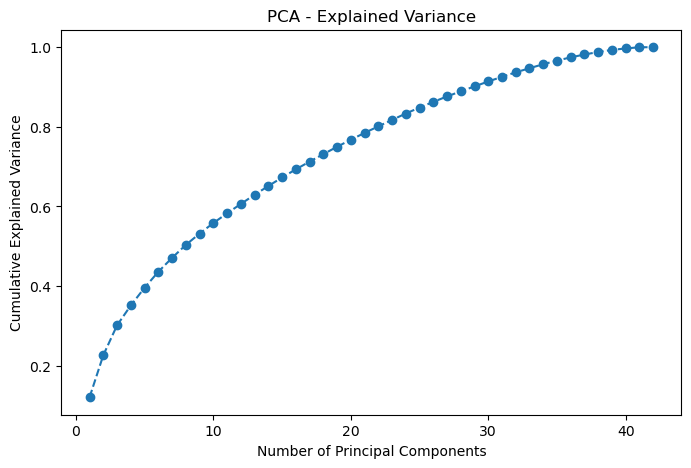

'\nPCA transforms the features into a set of linearly uncorrelated components. The number of components to select depends on the cumulative explained variance.\n\nSteps to interpret and select components:\n\nPlot the cumulative explained variance.\nChoose the number of components that explain a sufficient amount of variance (e.g., 95%).\n'

In [143]:
#Apply PCA

pca = PCA(n_components=42)
X_train_pca = pca.fit_transform(X_train_scaled_standard)
X_test_pca = pca.transform(X_test_scaled_standard)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance) + 1 ), cumulative_explained_variance, marker = 'o', linestyle = '--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

'''
PCA transforms the features into a set of linearly uncorrelated components. The number of components to select depends on the cumulative explained variance.

Steps to interpret and select components:

Plot the cumulative explained variance.
Choose the number of components that explain a sufficient amount of variance (e.g., 95%).
'''

In [144]:
explained_variance, cumulative_explained_variance

(array([1.20833133e-01, 1.05748465e-01, 7.49624693e-02, 4.98991190e-02,
        4.43529281e-02, 4.02237718e-02, 3.48852628e-02, 3.25578361e-02,
        2.83367599e-02, 2.65025250e-02, 2.44299759e-02, 2.35318189e-02,
        2.30482389e-02, 2.19408830e-02, 2.15077653e-02, 2.04044176e-02,
        1.94434694e-02, 1.87213142e-02, 1.85132989e-02, 1.78005526e-02,
        1.69890334e-02, 1.65739651e-02, 1.61393314e-02, 1.60019450e-02,
        1.51085618e-02, 1.41589761e-02, 1.37605673e-02, 1.27477743e-02,
        1.24894493e-02, 1.23326617e-02, 1.17534636e-02, 1.11933810e-02,
        1.03499456e-02, 1.00594130e-02, 9.12403319e-03, 8.08454372e-03,
        7.21229844e-03, 6.18605181e-03, 5.40630835e-03, 3.56076563e-03,
        3.12352579e-03, 2.38301336e-32]),
 array([0.12083313, 0.2265816 , 0.30154407, 0.35144319, 0.39579611,
        0.43601989, 0.47090515, 0.50346298, 0.53179974, 0.55830227,
        0.58273225, 0.60626406, 0.6293123 , 0.65125319, 0.67276095,
        0.69316537, 0.71260884, 0.

In [145]:
import seaborn as sns

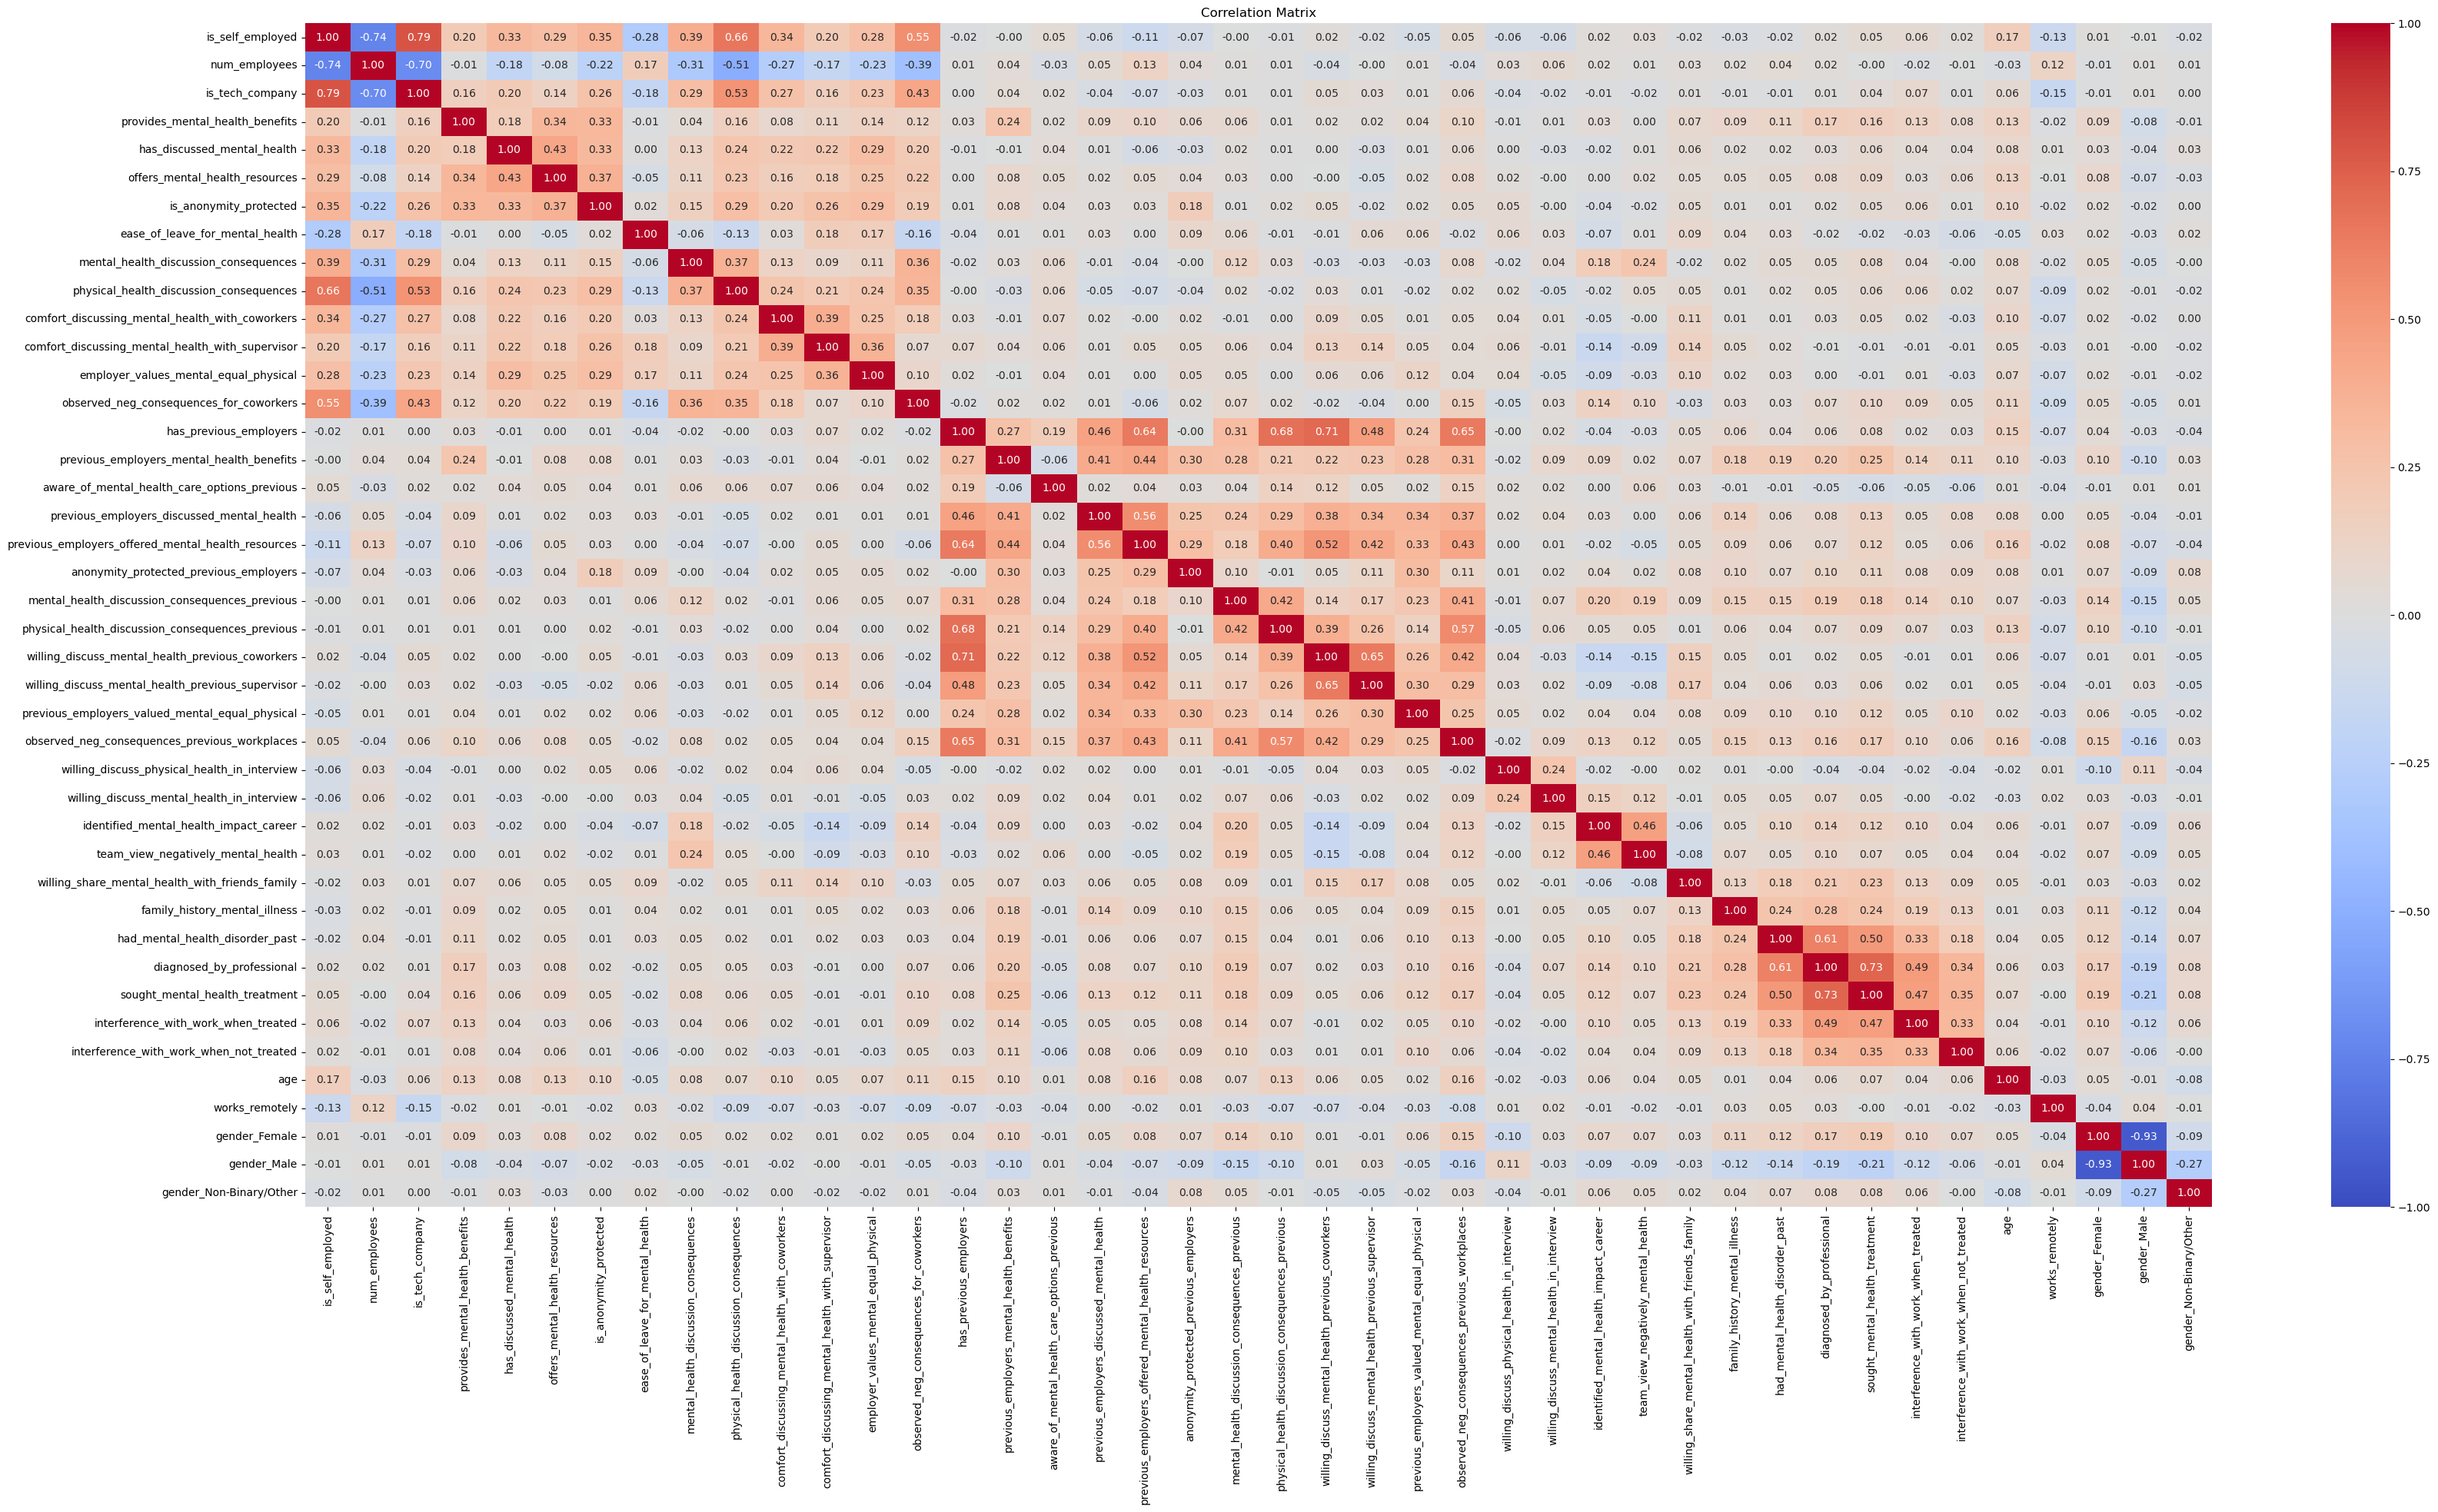

In [146]:
correlation_matrix = X.corr(method='pearson')

plt.figure(figsize=(40,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= "coolwarm", vmin=-1, vmax = 1 )
plt.title("Correlation Matrix")
plt.show()

In [147]:
correlation_threshold = 0.43
highly_correlated_features = np.where(np.abs(correlation_matrix) > correlation_threshold)
highly_correlated_pairs = [
    (correlation_matrix.index[x], correlation_matrix.columns[y])
    for x, y in zip(*highly_correlated_features) if x != y and x < y
]

print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(pair)

Highly Correlated Pairs:
('is_self_employed', 'num_employees')
('is_self_employed', 'is_tech_company')
('is_self_employed', 'physical_health_discussion_consequences')
('is_self_employed', 'observed_neg_consequences_for_coworkers')
('num_employees', 'is_tech_company')
('num_employees', 'physical_health_discussion_consequences')
('is_tech_company', 'physical_health_discussion_consequences')
('is_tech_company', 'observed_neg_consequences_for_coworkers')
('has_discussed_mental_health', 'offers_mental_health_resources')
('has_previous_employers', 'previous_employers_discussed_mental_health')
('has_previous_employers', 'previous_employers_offered_mental_health_resources')
('has_previous_employers', 'physical_health_discussion_consequences_previous')
('has_previous_employers', 'willing_discuss_mental_health_previous_coworkers')
('has_previous_employers', 'willing_discuss_mental_health_previous_supervisor')
('has_previous_employers', 'observed_neg_consequences_previous_workplaces')
('previous_

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet, SGDClassifier, LogisticRegression, RidgeClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [171]:
S_scaler = StandardScaler()
X_train_scaled_standard = S_scaler.fit_transform(X_train)
X_test_scaled_standard = S_scaler.transform(X_test)

MM_scaler = MinMaxScaler()
X_train_scaled_MM = MM_scaler.fit_transform(X_train)
X_test_scaled_MM = MM_scaler.transform(X_test)

def model_assess(model,name='Default'):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f'--- {name} ---')
    print(confusion_matrix(y_test,preds), '\n')
    print('Accuracy:', round(accuracy_score(y_test,preds),5), '\n')



def model_assess_S(model, name='Default'):
    model.fit(X_train_scaled_standard, y_train)
    preds = model.predict(X_test_scaled_standard)
    print(f'--- {name} ---\n')
    print(confusion_matrix(y_test, preds), '\n')
    print('Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

def model_assess_MM(model, name='Default'):
    model.fit(X_train_scaled_MM, y_train)
    preds = model.predict(X_test_scaled_MM)
    print(f'--- {name} ---\n')
    print(confusion_matrix(y_test, preds), '\n')
    print('Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')



In [172]:
nb = GaussianNB()
model_assess(nb, 'Naive Bayes')
model_assess_S(nb, 'Naive Bayes')
model_assess_MM(nb, 'Naive Bayes')
'''Naive Bayes: A probabilistic classifier based on Bayes' theorem with the assumption of independence between features.'''

--- Naive Bayes ---
[[31 18 17]
 [ 9 86 11]
 [19  8 88]] 

Accuracy: 0.71429 

--- Naive Bayes ---

[[31 18 17]
 [ 9 86 11]
 [19  8 88]] 

Accuracy: 0.71429 

--- Naive Bayes ---

[[31 18 17]
 [ 9 86 11]
 [19  8 88]] 

Accuracy: 0.71429 



"Naive Bayes: A probabilistic classifier based on Bayes' theorem with the assumption of independence between features."

In [173]:
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd,name = 'Stochastic Gradient Descent')
model_assess_S(sgd,name = 'Stochastic Gradient Descent')
model_assess_MM(sgd,name = 'Stochastic Gradient Descent')
'''Stochastic Gradient Descent: A simple and efficient method for fitting linear models, especially useful for large datasets.'''

--- Stochastic Gradient Descent ---
[[54  1 11]
 [72 22 12]
 [29  1 85]] 

Accuracy: 0.56098 

--- Stochastic Gradient Descent ---

[[35 12 19]
 [28 64 14]
 [30  9 76]] 

Accuracy: 0.60976 

--- Stochastic Gradient Descent ---

[[49  8  9]
 [25 72  9]
 [37  8 70]] 

Accuracy: 0.66551 



'Stochastic Gradient Descent: A simple and efficient method for fitting linear models, especially useful for large datasets.'

In [174]:
knn = KNeighborsClassifier(n_neighbors=21)
model_assess(knn, name = 'KNN')
model_assess_S(knn, name = 'KNN')
model_assess_MM(knn, name = 'KNN')
'''KNN: A non-parametric method that classifies samples based on the majority class of their k nearest neighbors.'''

--- KNN ---
[[10 19 37]
 [ 0 73 33]
 [ 7 18 90]] 

Accuracy: 0.60279 

--- KNN ---

[[ 14  22  30]
 [  2  85  19]
 [  3  10 102]] 

Accuracy: 0.70035 

--- KNN ---

[[  7  29  30]
 [  1  87  18]
 [  1  14 100]] 

Accuracy: 0.67596 



'KNN: A non-parametric method that classifies samples based on the majority class of their k nearest neighbors.'

In [175]:
tree = DecisionTreeClassifier()
model_assess(tree, name = 'Decision Trees')
model_assess_S(tree, name = 'Decision Trees')
model_assess_MM(tree, name = 'Decision Trees')
'''Decision Trees: A non-linear classifier that splits the data based on feature values to create a tree of decisions.'''

--- Decision Trees ---
[[36 14 16]
 [16 78 12]
 [20 21 74]] 

Accuracy: 0.65505 

--- Decision Trees ---

[[33 15 18]
 [13 80 13]
 [18 22 75]] 

Accuracy: 0.65505 

--- Decision Trees ---

[[34 15 17]
 [18 78 10]
 [18 21 76]] 

Accuracy: 0.65505 



'Decision Trees: A non-linear classifier that splits the data based on feature values to create a tree of decisions.'

In [176]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, name = 'Random Forest')
model_assess_S(rforest, name = 'Random Forest')
model_assess_MM(rforest, name = 'Random Forest')

'''Random Forest: An ensemble method that builds multiple decision trees and merges them to improve accuracy and control overfitting.'''

--- Random Forest ---
[[ 31   8  27]
 [ 11  79  16]
 [  6   4 105]] 

Accuracy: 0.74913 

--- Random Forest ---

[[ 31   8  27]
 [ 11  79  16]
 [  6   4 105]] 

Accuracy: 0.74913 

--- Random Forest ---

[[ 31   8  27]
 [ 11  79  16]
 [  6   4 105]] 

Accuracy: 0.74913 



'Random Forest: An ensemble method that builds multiple decision trees and merges them to improve accuracy and control overfitting.'

In [177]:
svm = SVC(decision_function_shape='ovo')
model_assess(svm, 'Support Vector Machine')
model_assess_S(svm, 'Support Vector Machine')
model_assess_MM(svm, 'Support Vector Machine')
'''Support Vector Machine: A linear classifier that finds the hyperplane that best separates different classes.'''

--- Support Vector Machine ---
[[ 13  17  36]
 [  3  82  21]
 [  0   8 107]] 

Accuracy: 0.70383 

--- Support Vector Machine ---

[[ 33  12  21]
 [  8  84  14]
 [  6   5 104]] 

Accuracy: 0.77003 

--- Support Vector Machine ---

[[ 31  14  21]
 [  9  84  13]
 [  9   6 100]] 

Accuracy: 0.74913 



'Support Vector Machine: A linear classifier that finds the hyperplane that best separates different classes.'

In [178]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10000)
model_assess(lg, 'Logistic Regression')
model_assess_S(lg, 'Logistic Regression')
model_assess_MM(lg, 'Logistic Regression')

'''Logistic Regression: A linear model for binary or multinomial classification that models the probability of the default class.'''

--- Logistic Regression ---
[[35 15 16]
 [ 7 85 14]
 [11  8 96]] 

Accuracy: 0.75261 

--- Logistic Regression ---

[[34 15 17]
 [ 7 85 14]
 [12  7 96]] 

Accuracy: 0.74913 

--- Logistic Regression ---

[[34 15 17]
 [ 7 85 14]
 [10  8 97]] 

Accuracy: 0.75261 



'Logistic Regression: A linear model for binary or multinomial classification that models the probability of the default class.'

In [181]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150,10),random_state=1,  max_iter=3000)
model_assess(nn,'Neural Nets')
model_assess_S(nn,'Neural Nets')
model_assess_MM(nn,'Neural Nets')

'''Neural Nets: A model that mimics the human brain, consisting of layers of interconnected nodes (neurons).'''

--- Neural Nets ---
[[35 15 16]
 [18 68 20]
 [25 21 69]] 

Accuracy: 0.5993 

--- Neural Nets ---

[[39 14 13]
 [10 80 16]
 [15 13 87]] 

Accuracy: 0.71777 

--- Neural Nets ---

[[29 12 25]
 [14 77 15]
 [16 17 82]] 

Accuracy: 0.65505 



'Neural Nets: A model that mimics the human brain, consisting of layers of interconnected nodes (neurons).'

In [182]:
xgb = XGBClassifier(n_estimators=1000,learning_rate=0.85)
model_assess(xgb, 'XGBoost')
model_assess_S(xgb, 'XGBoost')
model_assess_MM(xgb, 'XGBoost')

'''XGBoost: An optimized gradient boosting library designed to be highly efficient, flexible, and portable.'''

--- XGBoost ---
[[37 12 17]
 [ 8 84 14]
 [13  5 97]] 

Accuracy: 0.75958 

--- XGBoost ---

[[37 12 17]
 [ 8 84 14]
 [13  5 97]] 

Accuracy: 0.75958 

--- XGBoost ---

[[37 12 17]
 [ 8 84 14]
 [13  5 97]] 

Accuracy: 0.75958 



'XGBoost: An optimized gradient boosting library designed to be highly efficient, flexible, and portable.'

In [183]:
xgbrf = XGBRFClassifier(objective='multi:soft')
model_assess(xgbrf,'XGBoost RF')
model_assess_S(xgbrf,'XGBoost RF')
model_assess_MM(xgbrf,'XGBoost RF')

'''XGBRFClassifier (Cross Gradient Booster with Random Forest): A combination of gradient boosting and random forest techniques to improve performance.'''

--- XGBoost RF ---
[[ 34   7  25]
 [  9  81  16]
 [  5   5 105]] 

Accuracy: 0.76655 

--- XGBoost RF ---

[[ 34   7  25]
 [  9  81  16]
 [  5   5 105]] 

Accuracy: 0.76655 

--- XGBoost RF ---

[[ 34   7  25]
 [  9  81  16]
 [  5   5 105]] 

Accuracy: 0.76655 



'XGBRFClassifier (Cross Gradient Booster with Random Forest): A combination of gradient boosting and random forest techniques to improve performance.'

In [184]:
gbm=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
model_assess(gbm, 'Gradient Boosting Machine')
model_assess_S(gbm, 'Gradient Boosting Machine')
model_assess_MM(gbm, 'Gradient Boosting Machine')
'''Gradient Boosting Machine (GBM): An ensemble technique that builds trees sequentially, with each tree trying to correct the errors of the previous one.'''

--- Gradient Boosting Machine ---
[[ 39  10  17]
 [  7  84  15]
 [ 13   2 100]] 

Accuracy: 0.777 

--- Gradient Boosting Machine ---

[[ 39  10  17]
 [  7  84  15]
 [ 13   2 100]] 

Accuracy: 0.777 

--- Gradient Boosting Machine ---

[[ 39  10  17]
 [  7  84  15]
 [ 13   2 100]] 

Accuracy: 0.777 



'Gradient Boosting Machine (GBM): An ensemble technique that builds trees sequentially, with each tree trying to correct the errors of the previous one.'

In [185]:
lgbm = LGBMClassifier()
model_assess(lgbm, 'Light GBM')
model_assess_S(lgbm, 'Light GBM')
model_assess_MM(lgbm, 'Light GBM')

'''LightGBM: A fast, distributed, high-performance gradient boosting framework based on decision tree algorithms, designed for efficient handling of large datasets.'''

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 42
[LightGBM] [Info] Start training from score -1.479512
[LightGBM] [Info] Start training from score -0.991944
[LightGBM] [Info] Start training from score -0.912806
--- Light GBM ---
[[38  9 19]
 [ 9 83 14]
 [13  5 97]] 

Accuracy: 0.75958 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 42
[LightGBM] [Info] Start training from score -1.479512
[LightGBM] [Info] Start training from score -0.991944
[LightGBM] [Inf

'LightGBM: A fast, distributed, high-performance gradient boosting framework based on decision tree algorithms, designed for efficient handling of large datasets.'

In [186]:
catboost = CatBoostClassifier(silent=True)
model_assess(catboost, 'CatBoost')
model_assess_S(catboost, 'CatBoost')
model_assess_MM(catboost, 'CatBoost')

'''CatBoost: A gradient boosting algorithm that handles categorical features automatically and efficiently.'''

--- CatBoost ---
[[ 39   9  18]
 [  7  85  14]
 [ 10   4 101]] 

Accuracy: 0.78397 

--- CatBoost ---

[[ 39   9  18]
 [  7  85  14]
 [ 10   4 101]] 

Accuracy: 0.78397 

--- CatBoost ---

[[ 39   9  18]
 [  7  85  14]
 [ 10   4 101]] 

Accuracy: 0.78397 



'CatBoost: A gradient boosting algorithm that handles categorical features automatically and efficiently.'

In [187]:
adaboost = AdaBoostClassifier(n_estimators=100,random_state=0)
model_assess(adaboost,'AdaBoost')
model_assess_S(adaboost,'AdaBoost')
model_assess_MM(adaboost,'AdaBoost')

'''AdaBoost: An ensemble technique that combines multiple weak classifiers to create a strong classifier.'''

--- AdaBoost ---
[[38  9 19]
 [12 81 13]
 [14  6 95]] 

Accuracy: 0.74564 

--- AdaBoost ---

[[38  9 19]
 [12 81 13]
 [14  6 95]] 

Accuracy: 0.74564 

--- AdaBoost ---

[[38  9 19]
 [12 81 13]
 [14  6 95]] 

Accuracy: 0.74564 



'AdaBoost: An ensemble technique that combines multiple weak classifiers to create a strong classifier.'

In [188]:
et = ExtraTreesClassifier(n_estimators=100, random_state=0)
model_assess(et,'Extra Trees Classifier')
model_assess_S(et,'Extra Trees Classifier')
model_assess_MM(et,'Extra Trees Classifier')

'''Extra Trees Classifier: An ensemble method that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting.'''

--- Extra Trees Classifier ---
[[ 32   9  25]
 [ 11  80  15]
 [  7   4 104]] 

Accuracy: 0.75261 

--- Extra Trees Classifier ---

[[ 32   9  25]
 [ 11  80  15]
 [  7   4 104]] 

Accuracy: 0.75261 

--- Extra Trees Classifier ---

[[ 32   9  25]
 [ 11  80  15]
 [  7   4 104]] 

Accuracy: 0.75261 



'Extra Trees Classifier: An ensemble method that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting.'

In [189]:
lda = LinearDiscriminantAnalysis()
model_assess(lda, 'Linear Discriminant Analysis')
model_assess_S(lda, 'Linear Discriminant Analysis')
model_assess_MM(lda, 'Linear Discriminant Analysis')

'''Linear Discriminant Analysis (LDA): A classification method that assumes different classes generate data based on different Gaussian distributions.'''

--- Linear Discriminant Analysis ---
[[34 15 17]
 [ 7 86 13]
 [11  7 97]] 

Accuracy: 0.7561 

--- Linear Discriminant Analysis ---

[[34 15 17]
 [ 7 86 13]
 [11  7 97]] 

Accuracy: 0.7561 

--- Linear Discriminant Analysis ---

[[34 15 17]
 [ 7 86 13]
 [11  7 97]] 

Accuracy: 0.7561 



'Linear Discriminant Analysis (LDA): A classification method that assumes different classes generate data based on different Gaussian distributions.'

In [190]:
qda = QuadraticDiscriminantAnalysis()
model_assess(qda, 'Quadratic Discriminant Analyis')
model_assess_S(qda, 'Quadratic Discriminant Analyis')
model_assess_MM(qda, 'Quadratic Discriminant Analyis')

'''Quadratic Discriminant Analysis (QDA): Similar to LDA but assumes that each class has its own covariance matrix.'''

--- Quadratic Discriminant Analyis ---
[[33 22 11]
 [26 69 11]
 [36 25 54]] 

Accuracy: 0.54355 

--- Quadratic Discriminant Analyis ---

[[36 18 12]
 [14 80 12]
 [23 15 77]] 

Accuracy: 0.67247 

--- Quadratic Discriminant Analyis ---

[[31 19 16]
 [14 79 13]
 [18 14 83]] 

Accuracy: 0.67247 



c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'Quadratic Discriminant Analysis (QDA): Similar to LDA but assumes that each class has its own covariance matrix.'

In [191]:
ridge = RidgeClassifier()
model_assess(ridge, 'Ridge Classifier')
model_assess_S(ridge, 'Ridge Classifier')
model_assess_MM(ridge, 'Ridge Classifier')

'''Ridge Classifier: A linear model for classification with L2 regularization.'''

--- Ridge Classifier ---
[[32 17 17]
 [ 7 86 13]
 [ 9  8 98]] 

Accuracy: 0.75261 

--- Ridge Classifier ---

[[32 17 17]
 [ 7 86 13]
 [ 9  8 98]] 

Accuracy: 0.75261 

--- Ridge Classifier ---

[[32 17 17]
 [ 7 86 13]
 [ 9  8 98]] 

Accuracy: 0.75261 



'Ridge Classifier: A linear model for classification with L2 regularization.'

In [192]:
lasso_logistic = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
model_assess(lasso_logistic, 'Lasso Logistic Regression')
model_assess_S(lasso_logistic, 'Lasso Logistic Regression')
model_assess_MM(lasso_logistic, 'Lasso Logistic Regression')

'''Lasso Regression: A linear model with L1 regularization to encourage sparsity and reduce overfitting.'''

--- Lasso Logistic Regression ---
[[34 15 17]
 [ 7 85 14]
 [11  8 96]] 

Accuracy: 0.74913 

--- Lasso Logistic Regression ---

[[34 15 17]
 [ 7 85 14]
 [12  7 96]] 

Accuracy: 0.74913 

--- Lasso Logistic Regression ---

[[35 15 16]
 [ 7 85 14]
 [10  8 97]] 

Accuracy: 0.7561 



'Lasso Regression: A linear model with L1 regularization to encourage sparsity and reduce overfitting.'

In [193]:
elastic_net_logistic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.7, max_iter=10000)
model_assess(elastic_net_logistic, 'ElasticNet Logistic Regression')
model_assess_S(elastic_net_logistic, 'ElasticNet Logistic Regression')
model_assess_MM(elastic_net_logistic, 'ElasticNet Logistic Regression')

'''ElasticNet: A linear model that combines L1 and L2 regularization for better performance.'''

--- ElasticNet Logistic Regression ---
[[35 15 16]
 [ 7 85 14]
 [11  8 96]] 

Accuracy: 0.75261 

--- ElasticNet Logistic Regression ---

[[34 15 17]
 [ 7 85 14]
 [12  7 96]] 

Accuracy: 0.74913 

--- ElasticNet Logistic Regression ---

[[35 15 16]
 [ 7 85 14]
 [10  8 97]] 

Accuracy: 0.7561 



'ElasticNet: A linear model that combines L1 and L2 regularization for better performance.'

In [194]:
'''Generalized Linear Model (GLM): Extends linear models to allow the dependent variable to have a non-normal distribution.'''

'Generalized Linear Model (GLM): Extends linear models to allow the dependent variable to have a non-normal distribution.'

In [212]:
#Cot Boost got the most accuracy, so time for cross validation and hyperparameter tuning.

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

def gridSearch(parameters):
    skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    gsearch = GridSearchCV(estimator=CatBoostClassifier(silent=True), param_grid=parameters, cv=skf, scoring='accuracy', n_jobs=-1)
    gsearch.fit(X_train, y_train)
    best_model = gsearch.best_estimator_
    print(f'Best Parameters: {gsearch.best_params_}')
    
    preds = best_model.predict(X_test)
    preds_proba = best_model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, preds_proba, multi_class='ovr')
    
    print(confusion_matrix(y_test, preds))
    print(f'Accuracy: {accuracy_score(y_test, preds)}')
    print(f'ROC AUC: {roc_auc}')
    print(classification_report(y_test, preds))

# Define parameter grids for CatBoost
param_test1 = {
    'iterations': [100, 200, 500, 1000]
}

param_test2 = {
    'depth': [4, 5,  6, 7,  8]
}

param_test3 = {
    'learning_rate': [1e-05, 1e-02, 0.01, 0.1, 0.2]
}

param_test4 = {
    'l2_leaf_reg': [1, 2, 3, 4, 5, 7]
}

param_test5 = {
    'border_count': [32, 40, 50, 60, 100]
}

param_test6 = {
    'bagging_temperature': [0, 1, 2, 3, 4, 5, 10]
}

param_test7 = {
    'random_strength': [1, 2, 5, 10, 15, 20, 25]
}

param_test8 = {
    'one_hot_max_size': [1,2,3, 5, 10, 20]
}

# Run GridSearchCV for each set of parameters
print("Testing iterations...")
gridSearch(param_test1)

print("\nTesting depth...")
gridSearch(param_test2)

print("\nTesting learning_rate...")
gridSearch(param_test3)

print("\nTesting l2_leaf_reg...")
gridSearch(param_test4)

print("\nTesting border_count...")
gridSearch(param_test5)

print("\nTesting bagging_temperature...")
gridSearch(param_test6)

print("\nTesting random_strength...")
gridSearch(param_test7)

print("\nTesting one_hot_max_size...")
gridSearch(param_test8)

Testing iterations...
Best Parameters: {'iterations': 500}
[[ 40   8  18]
 [  8  84  14]
 [  9   3 103]]
Accuracy: 0.7909407665505227
ROC AUC: 0.8875159387574679
              precision    recall  f1-score   support

           0       0.70      0.61      0.65        66
           1       0.88      0.79      0.84       106
           2       0.76      0.90      0.82       115

    accuracy                           0.79       287
   macro avg       0.78      0.76      0.77       287
weighted avg       0.79      0.79      0.79       287


Testing depth...
Best Parameters: {'depth': 8}
[[ 38   9  19]
 [  8  82  16]
 [  8   3 104]]
Accuracy: 0.7804878048780488
ROC AUC: 0.8904217046829258
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        66
           1       0.87      0.77      0.82       106
           2       0.75      0.90      0.82       115

    accuracy                           0.78       287
   macro avg       0.77      0.75 

In [213]:
def model_assess(model,name='Default'):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f'--- {name} ---')
    print(confusion_matrix(y_test,preds), '\n')
    print('Accuracy:', round(accuracy_score(y_test,preds),5), '\n')
    roc_auc = roc_auc_score(y_test, preds_proba, multi_class='ovr')
    print(f'ROC AUC: {roc_auc}')
    print(classification_report(y_test, preds))

    

catboost_tuned = CatBoostClassifier(silent =True, iterations=500)

model_assess(catboost_tuned, 'CatBoost Tuned')

--- CatBoost Tuned ---
[[ 40   8  18]
 [  8  84  14]
 [  9   3 103]] 

Accuracy: 0.79094 

ROC AUC: 0.8882011022414829
              precision    recall  f1-score   support

           0       0.70      0.61      0.65        66
           1       0.88      0.79      0.84       106
           2       0.76      0.90      0.82       115

    accuracy                           0.79       287
   macro avg       0.78      0.76      0.77       287
weighted avg       0.79      0.79      0.79       287



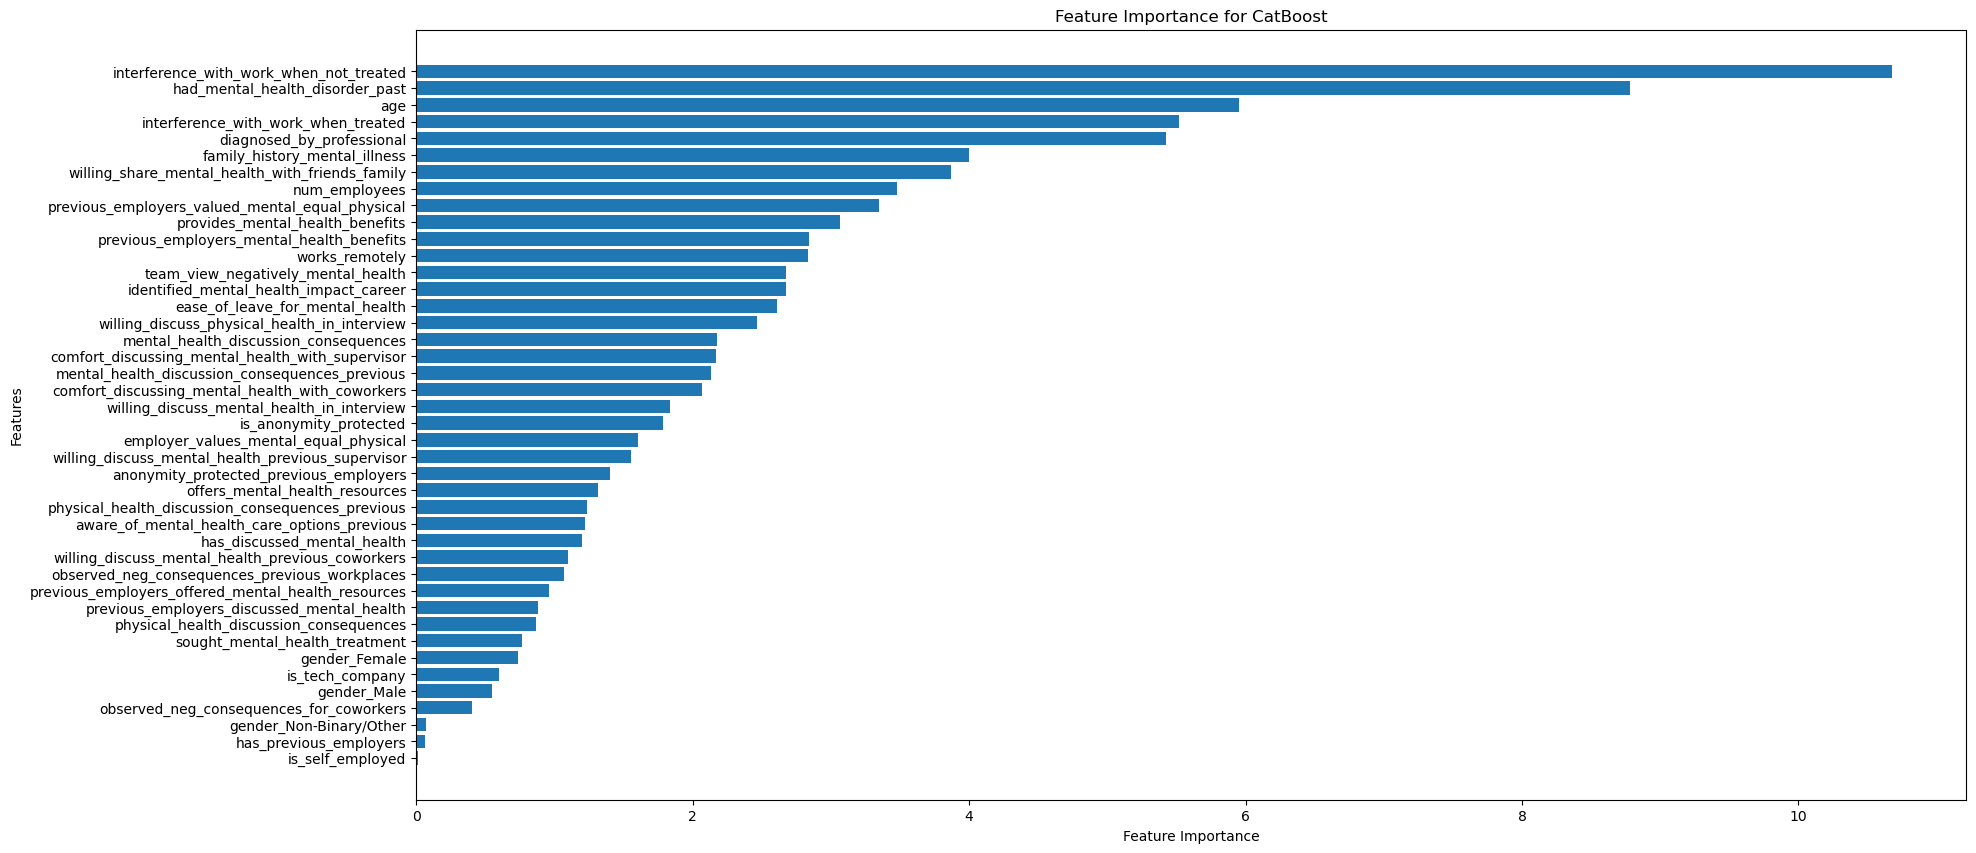

In [221]:
from catboost import Pool, cv
feature_importance = catboost_tuned.get_feature_importance(Pool(X_train, label=y_train))
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for CatBoost")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [ ]:
import eli5